In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 정리 순서 
# 데이터 불러오기 > 합치기 (all_df) > preprocessing_df > 이후 테스트 및 트레인

In [2]:
test_df = pd.read_csv('./test.csv', parse_dates=["datetime"])
train_df = pd.read_csv('./train.csv', parse_dates=["datetime"])

In [3]:
test_df.shape

(6493, 9)

In [4]:
train_df.shape

(10886, 12)

In [7]:
all_df = pd.concat((train_df, test_df), axis=0).reset_index() # 안할시에는 기존 test_df의 인덱스 번호가 붙어서 생성됨
all_df

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [9]:
#나중에 다시 분리할 때, 몇개까지가 train이고 test인지 모르기때문에 아래와같이 인덱스를 미리 구해놓음
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df),len(all_df)))  # all_df 가 결국 두개합친거니까 
################################################################

---

In [12]:
# 당연히 널값부터확인
all_df.isnull().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

### Evaluation metrics

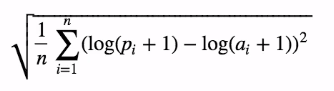

#### nan_to_num
nan 값을 매우 작은값으로 치환시켜줌

In [15]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.log(y+1))
    log2 = np.nan_to_num(np.log(y_+1))
    calc = (log1-log2)**2
    return np.sqrt(np.mean(calc))

---

In [16]:
del all_df['casual']
del all_df['registered']
del all_df['index']

In [17]:
pre_df = all_df.merge(pd.get_dummies(all_df['season'], prefix='season'), left_index=True, right_index=True)
pre_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16.0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40.0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32.0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13.0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,1,0,0,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,1,0,0,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,1,0,0,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,1,0,0,0


In [18]:
pre_df = pre_df.merge(pd.get_dummies(all_df['weather'], prefix='weather'), left_index=True, right_index=True)
pre_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16.0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40.0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32.0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13.0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,1,0,0,0,0,1,0,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,1,0,0,0,0,1,0,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,1,0,0,0,1,0,0,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,1,0,0,0,1,0,0,0


In [20]:
pre_df['datetime'].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-31T21:00:00.000000000', '2012-12-31T22:00:00.000000000',
       '2012-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
pre_df['year'] = pre_df["datetime"].dt.year
pre_df['month'] = pre_df["datetime"].dt.month
pre_df['day'] = pre_df["datetime"].dt.day
pre_df['hour'] = pre_df["datetime"].dt.hour
pre_df['weekday'] = pre_df["datetime"].dt.weekday

In [23]:
pre_df['weekday'].unique()
#이것도 결국 카테고리 데이터임을 알 수 있음 다시 get_dummies 해주자

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

In [24]:
pre_df = pre_df.merge(pd.get_dummies(pre_df['weekday'], prefix='weekday'), left_index=True, right_index=True)
pre_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16.0,...,1,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40.0,...,1,1,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32.0,...,1,2,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13.0,...,1,3,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1.0,...,1,4,5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,...,31,19,0,1,0,0,0,0,0,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,...,31,20,0,1,0,0,0,0,0,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,...,31,21,0,1,0,0,0,0,0,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,...,31,22,0,1,0,0,0,0,0,0


In [25]:
pre_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [31]:
category_lst = ['season','weather','weekday','season_1','season_2','season_3','season_4','weather_1','weather_2','weather_3','weather_4','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weekday_0','year','day','month','hour','workingday']

In [32]:
for i in category_lst:
    pre_df[i] = pre_df[i].astype("category")

In [33]:
pre_df.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [35]:
#일단 확인용으로 train_df만 가지고 봐보자

In [34]:
train_df = pre_df.iloc[train_index]

<function matplotlib.pyplot.show(close=None, block=None)>

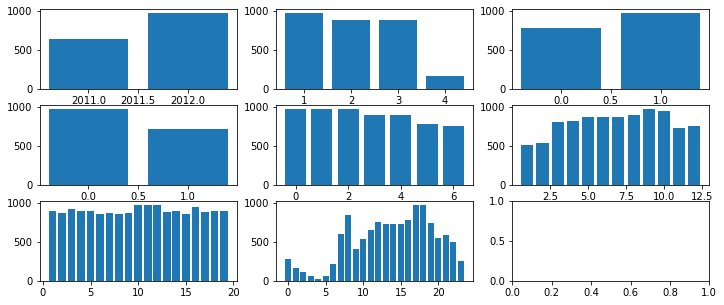

In [36]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12,5)
axes[0][0].bar(train_df['year'], train_df['count'])
axes[0][1].bar(train_df['weather'], train_df['count'])
axes[0][2].bar(train_df['workingday'], train_df['count'])
axes[1][0].bar(train_df['holiday'], train_df['count'])
axes[1][1].bar(train_df['weekday'], train_df['count'])
axes[1][2].bar(train_df['month'], train_df['count'])
axes[2][0].bar(train_df['day'], train_df['count'])
axes[2][1].bar(train_df['hour'], train_df['count'])
plt.show

In [37]:
#holiday랑 workingday는 당연히 상반되는거고
#겨울에 좀 덜빌리는것도 확인 [1][2]
# day는차이없고 hour는 출퇴근시간에많구나 알 수 있음

---

In [46]:
#count를 해서 평균으로 보고싶다면?
# groupby 부분을 바꿔가며 테스트해보면 좋다


In [44]:
series_data = train_df.groupby(['year','month'])['count'].mean()
series_data.index.tolist()[:5]

[(2011, 1), (2011, 2), (2011, 3), (2011, 4), (2011, 5)]

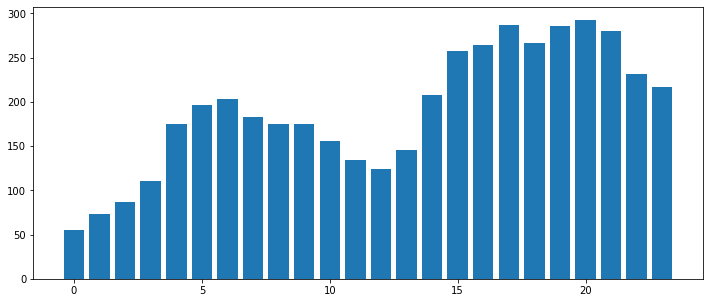

In [45]:
fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12,5)
plt.show()

---

In [47]:
import seaborn as sn

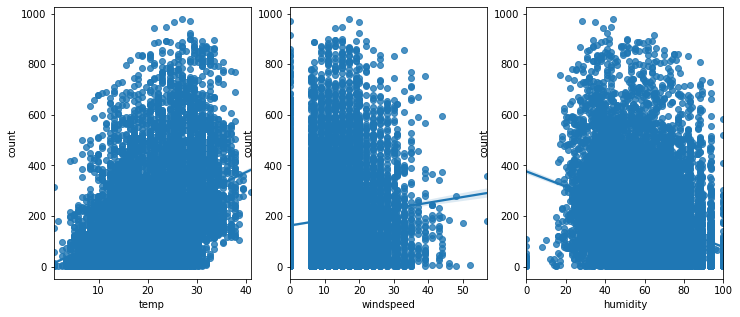

In [49]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sn.regplot(x='temp', y='count', data=train_df, ax=ax1)
sn.regplot(x='windspeed', y='count', data=train_df, ax=ax2)
sn.regplot(x='humidity', y='count', data=train_df, ax=ax3)
plt.show()

---

In [51]:
category_lst

['season',
 'weather',
 'weekday',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weekday_0',
 'year',
 'day',
 'month',
 'hour',
 'workingday']

In [52]:
#상관관계를 미리 살펴보는것도 좋다

In [53]:
corrmatt = train_df[['temp','atemp','humidity','windspeed','count']].corr()
corrmatt

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


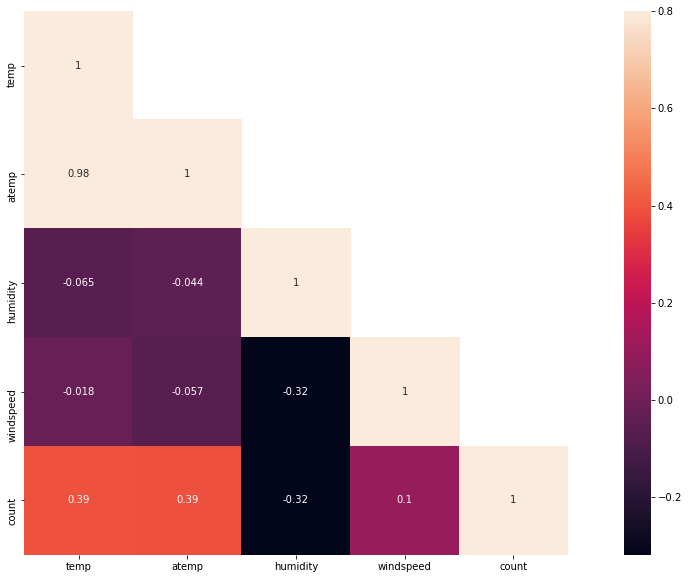

In [55]:
mask = np.array(corrmatt)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrmatt, mask=mask, vmax= .8, square=True, annot= True)
plt.show()

In [57]:
#temp와 atemp는 0.98, 즉 거의 같은데이터다 라고 보면되고 이건 빼주는게 좋다 (특히 LR)

In [ ]:
#이제는 이 feature는 중요한거다 아니다 등을 파악하는 전략을 짜보자
# 방법은 다양하지만 여기서는 모든 피쳐를 돌아가면서 조합을만들어서 테스트해볼꺼다
#테스트 내용은 따로 업로드 예정

In [58]:
conti = ["temp",'humidity','windspeed','atemp']

In [59]:
s_lst = ['season_1','season_2','season_3','season_4']
wt_lst= ['weather_1','weather_2','weather_3','weather_4']
wd_lst= ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']

In [60]:
cate = ["season",'holiday','workingday','weather','weekday','month','year','hour']

In [61]:
all_lst = conti + cate

In [62]:
all_lst.append(s_lst)
all_lst.append(wt_lst)
all_lst.append(wd_lst)

In [63]:
all_lst

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [65]:
num_variables = len(all_lst)
num_variables

15

In [ ]:
########################################################################